# Hum Engagement Time Machine
## Final Model Using k-Means Clustered Labels and MLP-Based Classification

## This file will go through the k-means clustering and labeling process.

### Data Processing

In [1]:
# load in data file from local device (reached_16_all.csv)
from google.colab import files
uploaded = files.upload()

Saving reached_16_all.csv to reached_16_all.csv


In [2]:
# import relevant packages
import pandas as pd
import numpy as np
import io

# read in uploaded csv data to a pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['reached_16_all.csv']))
df.sort_values(by = 'PROFILE_ID', inplace= True)
df

,Unnamed: 0,PROFILE_ID,REACHED_16_EVENTS,RECENT_LAST_EVENT,EVENT_CYCLES_ALL,DISTINCT_ARTICLES_ALL,PERCENT_GOOGLE_ARTICLES_ALL,PERCENT_ARTICLE_CONTENT_ALL,AVERAGE_CONTENT_SCORE_ALL,DAYS_TO_16_EVENTS,EVENTS,FIRST_EVENT_TIME,LATEST_EVENT_TIME,DISTINCT_DAYS
6,6,--0p74IB28LFeUkXSg6b,1,0,2,2,0.000000,1.000000,0.000000,133.0,16,2022-08-30 14:30:38.171966,2023-01-10 16:43:55.720219,2
13,13,--6dYIIB8Tq1gs32cnxN,1,0,1,1,1.000000,1.000000,0.000000,7.0,16,2022-08-02 22:11:48.120981,2022-08-09 16:19:25.990118,4
16,16,--7CGYYBRkWobPtw2Qjb,1,1,4,1,1.000000,1.000000,0.000000,27.0,24,2023-02-04 00:10:45.911994,2023-03-17 20:28:24.300215,5
18,18,--7egIIBGoM3uBpFKICG,1,0,11,11,1.000000,0.916667,1371.460317,5.0,63,2022-08-09 04:30:20.132357,2023-01-04 17:26:37.806226,15
26,26,--7xtoIBGoM3uBpFf0FV,1,0,3,2,0.000000,1.000000,0.000000,103.0,16,2022-08-19 16:30:57.064488,2022-11-30 19:41:43.155668,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138486,2293586,zzlKjIIBGoM3uBpFBagQ,1,1,6,5,0.800000,1.000000,0.000000,133.0,40,2022-08-11 09:43:58.953482,2023-03-25 12:01:41.668617,7
138245,2293345,zzpjDYQBEEdskq5qGMuW,1,0,5,1,0.000000,1.000000,0.000000,17.0,28,2022-10-25 04:25:09.614383,2023-02-11 00:25:21.186098,12
138016,2293116,zzrPDIQBEEdskq5qZRER,1,0,4,3,0.333333,1.000000,0.000000,129.0,16,2022-10-25 01:43:50.150416,2023-03-03 07:59:42.533219,4
137291,2292391,zzsQPYQBwWEOklUHCNVJ,1,0,1,0,0.000000,0.000000,0.000000,2.0,56,2022-11-03 10:36:12.009305,2022-11-08 11:59:11.293372,6


In [3]:
# remove outliers with greater than or equal to 100 events
df = df[df['EVENTS'] <= 100]

import datetime

# create potentially useful time-based features
# time till end
df['TTE'] = (pd.to_datetime(df['LATEST_EVENT_TIME'])-pd.to_datetime(df['FIRST_EVENT_TIME'])).dt.total_seconds() / (24 * 60 * 60)
# time till now
df['TTN'] = (datetime.datetime.now()-pd.to_datetime(df['FIRST_EVENT_TIME'])).dt.total_seconds() / (24 * 60 * 60)

# events per cycle
df['EpC'] = df['EVENTS']/df['EVENT_CYCLES_ALL']
# articles per event
df['ApE'] = df['DISTINCT_ARTICLES_ALL']/df['EVENTS']

# total events per day
df['tEpD'] = df['EVENTS']/df['TTN']
# active events per day
df['aEpD'] = df['EVENTS']/df['TTE']
# active ratio
df['aR'] = df['TTE']/df['TTN']

# event density
df['ED'] = df['EVENTS']/df['DISTINCT_DAYS']

# extract relevant columns of the data and their corresponding labels
#data = df[['EpC','ApE','PERCENT_GOOGLE_ARTICLES_ALL','PERCENT_ARTICLE_CONTENT_ALL','ED']]
data = df[['ApE','PERCENT_GOOGLE_ARTICLES_ALL','PERCENT_ARTICLE_CONTENT_ALL','ED']]
features = data.columns
data

<ipython-input-3-3b8b281a4312>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TTE'] = (pd.to_datetime(df['LATEST_EVENT_TIME'])-pd.to_datetime(df['FIRST_EVENT_TIME'])).dt.total_seconds() / (24 * 60 * 60)
<ipython-input-3-3b8b281a4312>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TTN'] = (datetime.datetime.now()-pd.to_datetime(df['FIRST_EVENT_TIME'])).dt.total_seconds() / (24 * 60 * 60)
<ipython-input-3-3b8b281a4312>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,ApE,PERCENT_GOOGLE_ARTICLES_ALL,PERCENT_ARTICLE_CONTENT_ALL,ED
6,0.125000,0.000000,1.000000,8.000000
13,0.062500,1.000000,1.000000,4.000000
16,0.041667,1.000000,1.000000,4.800000
18,0.174603,1.000000,0.916667,4.200000
26,0.125000,0.000000,1.000000,4.000000
...,...,...,...,...
138486,0.125000,0.800000,1.000000,5.714286
138245,0.035714,0.000000,1.000000,2.333333
138016,0.187500,0.333333,1.000000,4.000000
137291,0.000000,0.000000,0.000000,9.333333


In [4]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
data = scaler.fit_transform(data)

data

array([[-0.03698767, -0.82938483,  0.60325245, -0.00709135],
       [-0.77451504,  1.81838572,  0.60325245, -0.58553197],
       [-1.0203575 ,  1.81838572,  0.60325245, -0.46984385],
       ...,
       [ 0.7005397 ,  0.05320447,  0.60325245, -0.58553197],
       [-1.51204241, -0.82938483, -2.82118284,  0.18572219],
       [-1.14327873,  0.49450045,  0.60325245, -0.5028976 ]])

### Generate Training Labels

In [5]:
from sklearn.cluster import KMeans

# perform clustering to get training labels
k = 2
KM = KMeans(n_clusters = 2, max_iter = 500, random_state = 82113)
KM.fit(data)
labels = KM.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# proportion of labels that are 1
sum(labels)/len(labels)

0.805872042068361

0.18504197507227926
-0.7681539326363915

0.1393174058930307
-0.5783402018900307

0.40870911500816015
-1.6966502539503525

-0.19766170599560243
0.8205414838056729



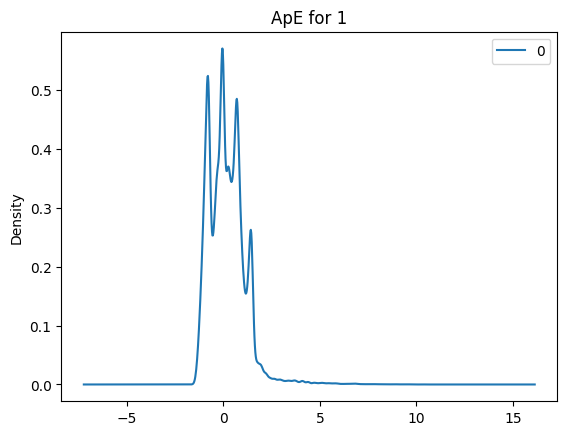

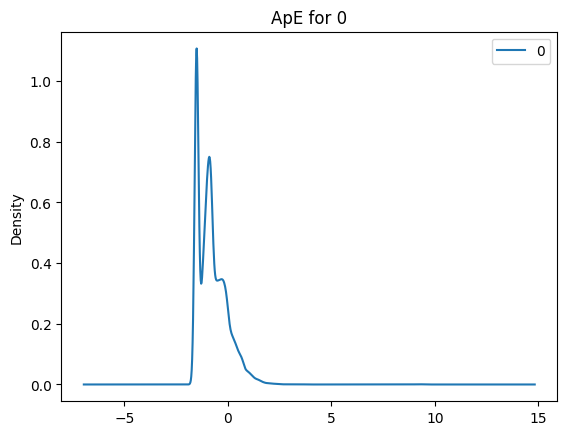

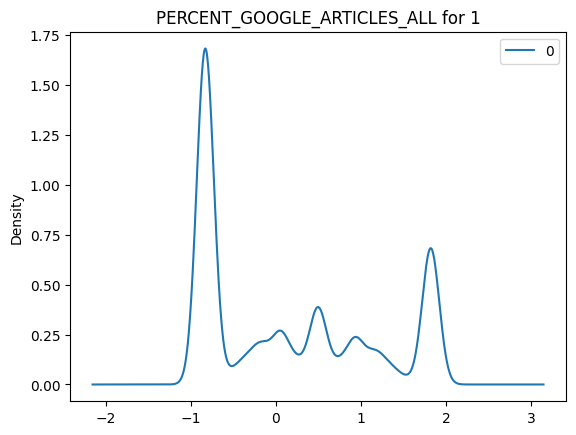

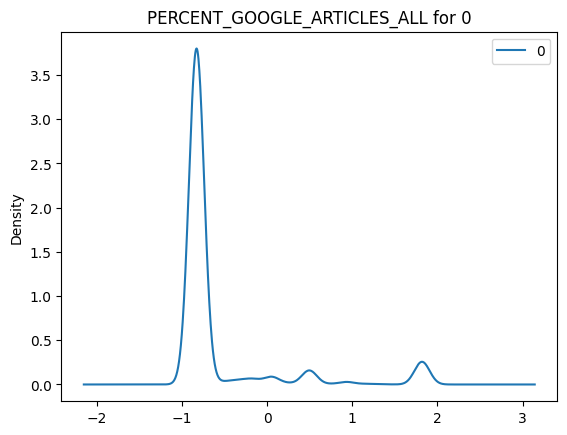

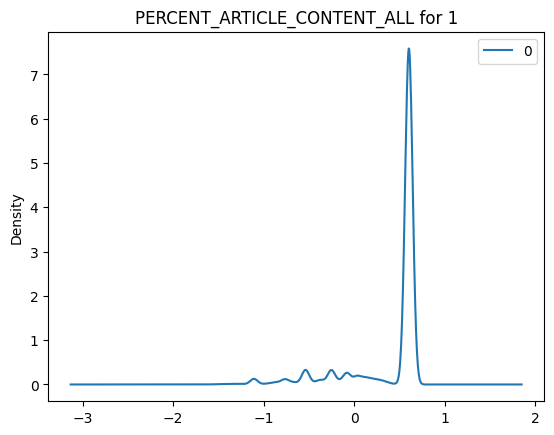

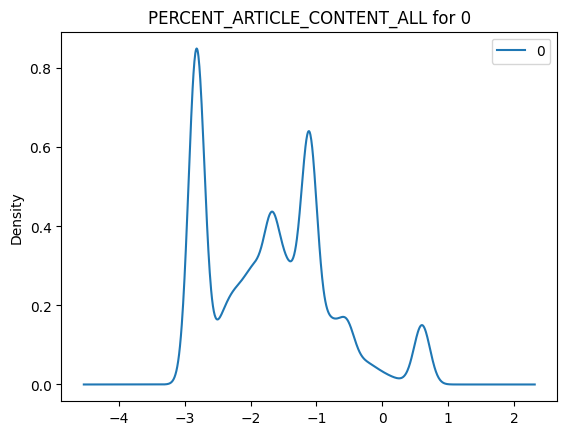

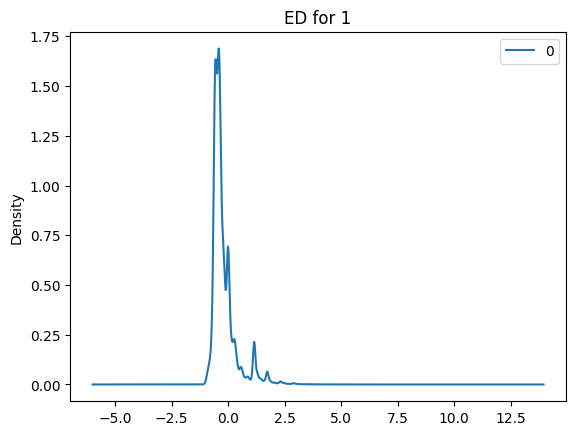

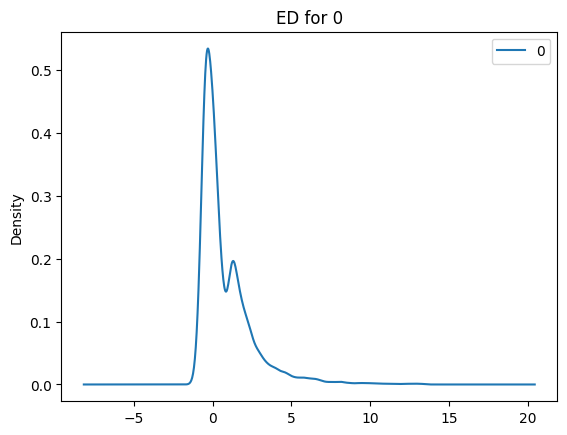

In [ ]:
# loop through each feature
for i in range(data.shape[1]):
  # plot the class conditional density
  pd.DataFrame(data[labels == 1,i]).plot.kde(title = f'{features[i]} for 1')
  pd.DataFrame(data[labels == 0,i]).plot.kde(title = f'{features[i]} for 0')
  # print the class conditional mean
  print(data[labels == 1,i].mean())
  print(data[labels == 0,i].mean())
  print()

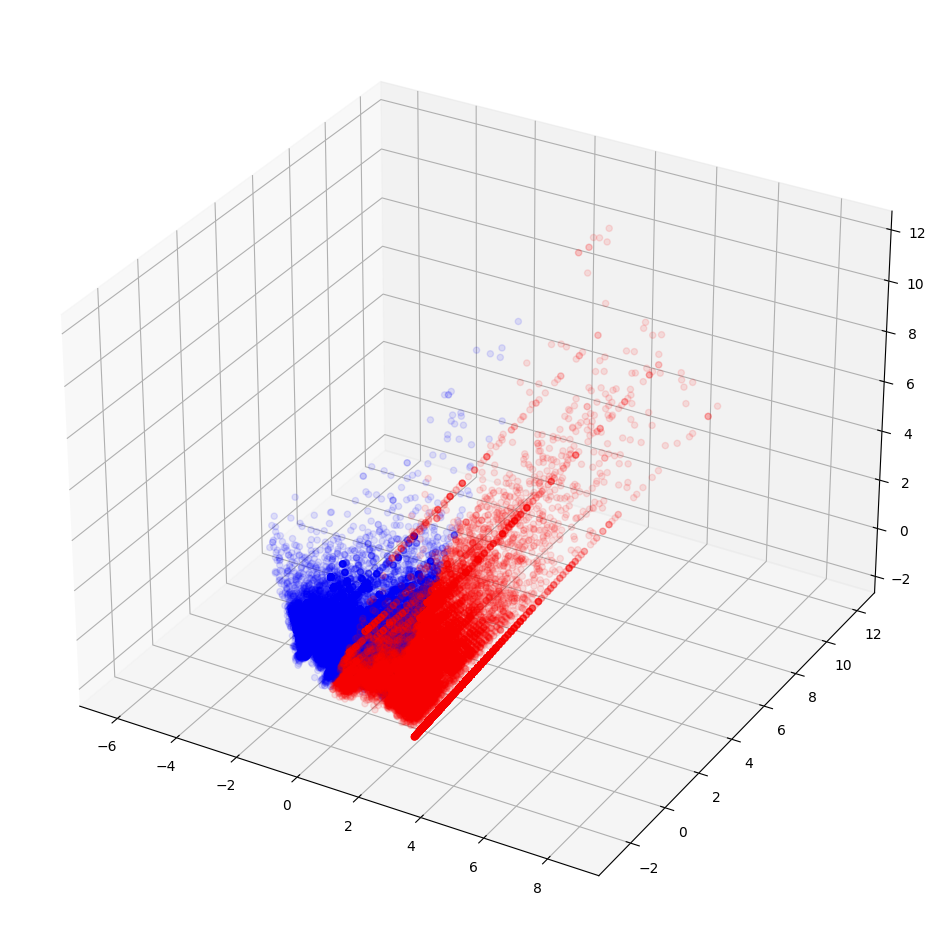

In [7]:
# visualize the clusters using PCA
from sklearn import decomposition
import matplotlib.pyplot as plt
import matplotlib

pca = decomposition.PCA(n_components=3)
points = pca.fit_transform(data)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# 3d projection
colors = ['red','blue']
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.1)
plt.show()

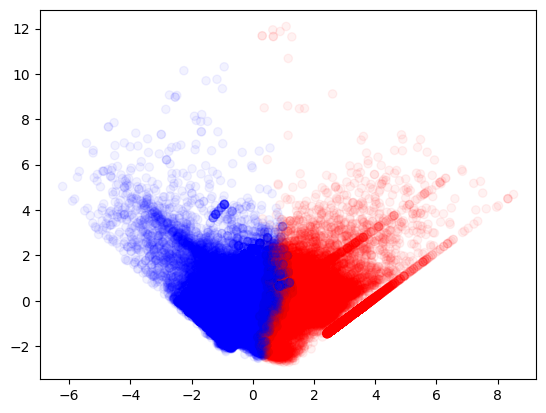

In [8]:
# 2d projection of the plot
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.05)
plt.show();

In [9]:
# print the 3 pca components
pca.components_

array([[-0.51044403, -0.42904288, -0.61151333,  0.42593491],
       [ 0.62916675, -0.61500399,  0.20500204,  0.428828  ],
       [-0.01719752,  0.58766842,  0.15503083,  0.79392412]])

In [10]:
from google.colab import files

# export training labels
training_labels = pd.DataFrame({'labels': labels})
training_labels.to_csv('training_labels.csv', index=False)
files.download('training_labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>